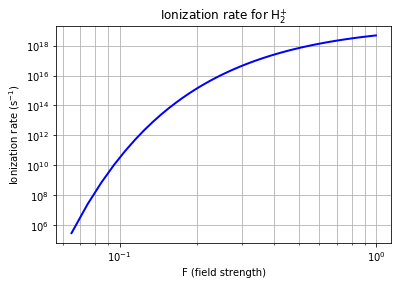

In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 13 00:20:43 2018

@author: Tsendee
"""

import math
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt

m = 0
l = np.array([0,2,4]) # for H2plus
Cl = np.array([4.37, 0.05, 0.00]) # for H2plus

#Cl = np.array([2.02,0.78,0.04]) # for N2


Qlm = (-1)**m*np.sqrt(factorial((2*l+1)*(l+m))/(2*factorial(l-m)))
Bm = np.sum(Cl*Qlm) 

Ip = 29.99/27.211 # eV to atomic unit conversion, Ip = 15.58 eV (N2)
k = np.sqrt(2*Ip)
Zc = 1

F = np.arange(0.065,1,0.01)

#Fpeak = 1;
#t = 1e-15*np.arange(-10,10,0.1)
#tau = 5e-15;
#c = 3e-8
#lambd = 800e-9
#omega = 2*np.pi*c/lambd
#F = Fpeak*np.exp(-2*np.log(2)*(t/tau)**2)*np.exp(omega*t)

A = ((Bm**2)/((2**m)*math.factorial(m)))
B = (1/k**(2*Zc/k-1))*((2*k**3/F)**((2*Zc/k)-m-1))
C = np.exp(-(2*k**3)/(3*F))

Wstat = 1e16*A*B*C
Wfr = (3*F/(np.pi*k**3))**0.5*Wstat

#Prob = 1-np.sum(np.exp(-Wstat*t))

plt.loglog(F,Wstat,'blue',linewidth=2)

plt.xlabel('F (field strength)')
plt.ylabel('Ionization rate (s$^{-1}$)')
plt.title('Ionization rate for H$_{2}^{+}$')
plt.grid(which='both',axis='both')

plt.savefig("MO-ADK model.pdf", dpi=1600)
plt.show()